In [14]:
import glob
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import numpy as np
sns.set(font_scale=1.2)

[0.04, 0.4, 0.79, 0.71, 0.48, 0.32, 0.2, 0.08, 0.06, 0.04, 0.04, 0.04, 0.04, 0.04]


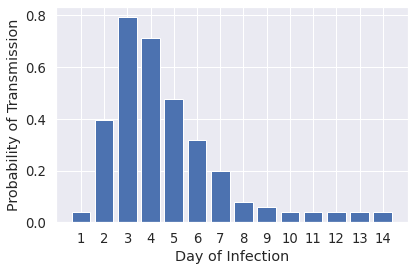

In [18]:
# Setting the probability of infection such that each node infects on average one other node (r=1)
mean_edge = 480.55348360000005
probs_inf = {1: 0.001, 2: 0.01, 3: 0.02, 4: 0.018, 5: 0.012,
             6: 0.008, 7: 0.005, 8: 0.002, 9: 0.0015, 10: 0.001,
             11: 0.001, 12: 0.001, 13: 0.001, 14: 0.001}
# As per the prob. density function calculated by: https://pubmed.ncbi.nlm.nih.gov/32145466/ (Fig. 1)
total_prob = np.sum(list(probs_inf.values()))
adjust_prob = total_prob*mean_edge

p_vals = [p*adjust_prob for p in probs_inf.values()]
print([round(p,2) for p in p_vals])
plt.bar(range(1,15),p_vals)
plt.xticks(range(1,15))
plt.ylabel("Probability of Transmission")
plt.xlabel("Day of Infection")
plt.tight_layout()
plt.savefig("../Results/FinalFigures/transmission_prob.svg")

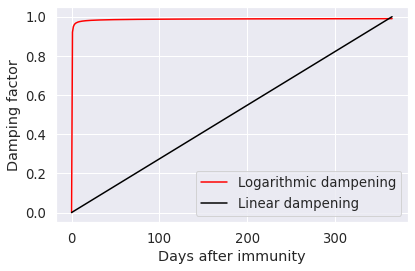

In [16]:
# Transmission rate is dependent on the time of last infection
def log_increase(day,alpha=1/10):
    val = alpha*math.log(1.0+day)/(1.0+(alpha*math.log(1.0+day)))
    return(val)
def lin_increase(day,cutoff=365):
    if day <= cutoff:
        val = day/cutoff
    else:
        val = 1
    return(val)

days = 366
plt.plot(range(days),[log_increase(d,16.8) for d in range(days)], color='red', label='Logarithmic dampening')
plt.plot(range(days),[lin_increase(d) for d in range(days)], color='black', label='Linear dampening')
plt.legend()
plt.ylabel("Damping factor")
plt.xlabel("Days after immunity")
plt.tight_layout()
plt.savefig('../Results/FinalFigures/dampening.svg')

Check sensitvity of the model parameters 

Network Properties
- power of the scale-free distribution
- transitivity of the network 
- no. of edges of the network (this will be linked to the transitivity) 

Model Properties 
- cutoff / alpha
- immunity length
- adj probability

The effect of the above parameters is checked against the following outputs
- the maximum number of infections at one time
- the maximum number of reinfections
- number of days that more than 1% of the population is infected 
- proportion of infecteds after 2 years 

In [19]:
def plot_network_properties(parameter): 
    fig, axs = plt.subplots(2, 2, figsize=(12, 6))
    col = 'k'
    size = 1
    print(parameter)
    result_files = glob.glob("../Results/*.csv")
    for file in result_files:
        result = pd.read_csv(file)
        x = result[parameter]
        y1,y2,y3,y4 = result['max_infs']/10000*100,result['prop_inf']/10000*100,result['max_reinf'],result['no_peaks']/730*100
        if parameter == "Power":
            xlab = "Degree exponent"
        else:
            xlab = parameter
        axs[0, 0].scatter(x, y1, s=size, color=col)
        axs[0, 0].set_xlabel(xlab)
        axs[0, 0].set_ylabel("Max. % infected\n at one time")
        axs[0, 1].scatter(x, y2, s=size, color=col)
        axs[0, 1].set_xlabel(xlab)
        axs[0, 1].set_ylabel('% of infecteds \nafter 2 years')
        axs[1, 0].scatter(x, y3, s=size, color=col)
        axs[1, 0].set_xlabel(xlab)
        axs[1, 0].set_ylabel('Max. number of\n reinfections')
        axs[1, 1].scatter(x, y4, s=size, color=col)
        axs[1, 1].set_xlabel(xlab)
        axs[1, 1].set_ylabel("% of days  for which \n > 1% is infected")
    axs[0, 0].text(0.03, 0.95,'a)',horizontalalignment='center',verticalalignment='center',transform = axs[0, 0].transAxes)
    axs[0, 1].text(0.03, 0.95,'b)',horizontalalignment='center',verticalalignment='center',transform = axs[0, 1].transAxes)
    axs[1, 0].text(0.03, 0.95,'c)',horizontalalignment='center',verticalalignment='center',transform = axs[1, 0].transAxes)
    axs[1, 1].text(0.03, 0.95,'d)',horizontalalignment='center',verticalalignment='center',transform = axs[1, 1].transAxes)
    plt.tight_layout()
    plt.savefig("../Results/FinalFigures/{}.png".format(parameter))
    plt.show()
    plt.close()

Transitivity


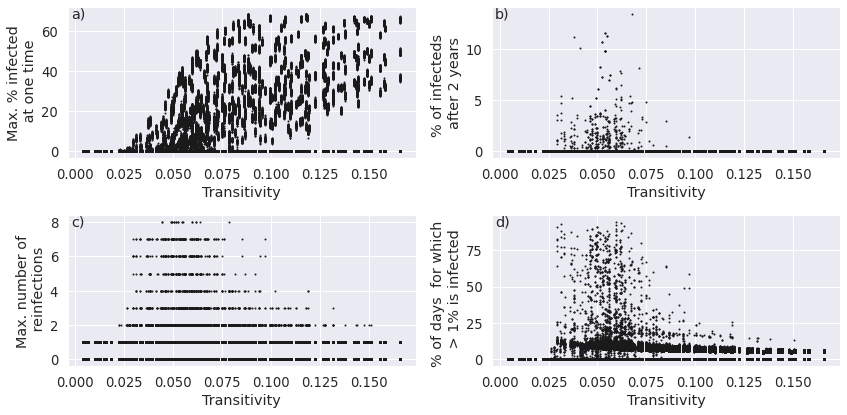

Edges


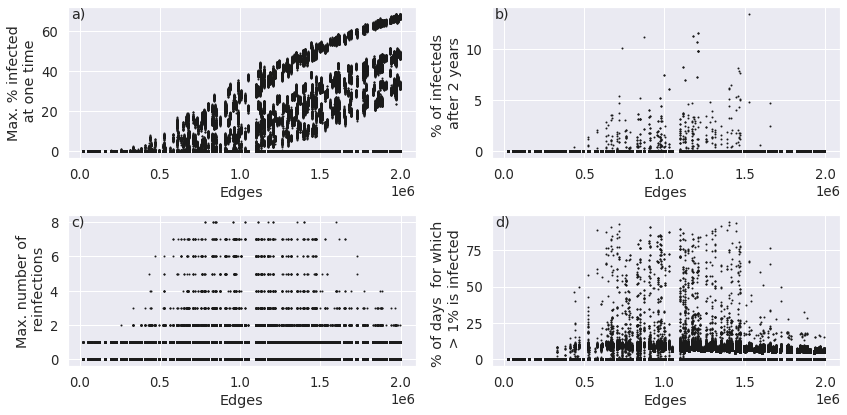

Power


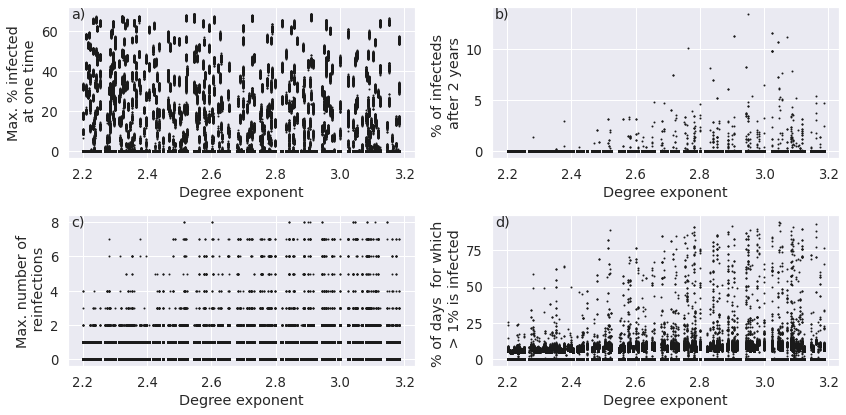

In [20]:
plot_network_properties('Transitivity')
plot_network_properties('Edges')
plot_network_properties('Power')

In [21]:
def plot_model_properties(parameter): 
    col = 'k'
    size = 1
    print(parameter)
    x_all = []
    y1_all = [] 
    y2_all = []
    y3_all = []
    y4_all = []
    result_files = glob.glob("../Results/*.csv")
    for file in result_files:
        if parameter in file:
            result = pd.read_csv(file)
            # Get number from file name 
            name_split = [a for a in file[:-4].split("_") if parameter in a]
            number_split = [x for x in name_split[0] if x.isalpha()==False]
            final_number = float(''.join(number_split))
            # Gather output 
            x = [final_number]*result.shape[0]
            y1,y2,y3,y4 = result['max_infs']/10000*100,result['prop_inf']/10000*100,result['max_reinf'],result['no_peaks']/730*100
            # Gather results 
            x_all = x_all + list(x)
            y1_all = y1_all + list(y1)
            y2_all = y2_all + list(y2)
            y3_all = y3_all + list(y3)
            y4_all = y4_all + list(y4)
    # Create dataframe to plot results
    df1 = pd.DataFrame({'x':x_all,'y':y1_all})
    df2 = pd.DataFrame({'x':x_all,'y':y2_all})
    df3 = pd.DataFrame({'x':x_all,'y':y3_all})
    df4 = pd.DataFrame({'x':x_all,'y':y4_all})
    if parameter == "alph":
        xlab = "α$_{log}$"
    elif parameter == "cut":
        xlab = "α$_{lin}$"
    elif parameter == "imlen":
        xlab = "I"
    elif parameter == "adj":
        xlab = "K"
    ax1 = sns.catplot(y="y", x="x", kind="violin", data=df1, cut=0)
    ax1.set_ylabels("Max. % infected at one time")
    ax1.set_xlabels(xlab)
    plt.tight_layout()
    plt.savefig("../Results/FinalFigures/{}A.svg".format(parameter))
    ax2 = sns.catplot(y="y", x="x", kind="violin", data=df2, cut=0)
    ax2.set_xlabels(xlab)
    ax2.set_ylabels('% of infecteds after 2 years')
    plt.tight_layout()
    plt.savefig("../Results/FinalFigures/{}B.svg".format(parameter))
    ax3 = sns.catplot(y="y", x="x", kind="violin", data=df3, cut=0)
    ax3.set_xlabels(xlab)
    ax3.set_ylabels('Max. number of reinfections')
    plt.tight_layout()
    plt.savefig("../Results/FinalFigures/{}C.svg".format(parameter))
    ax4 = sns.catplot(y="y", x="x", kind="violin", data=df4, cut=0)
    ax4.set_xlabels(xlab)
    ax4.set_ylabels("% of days  for which > 1% is infected")
    plt.tight_layout()
    plt.savefig("../Results/FinalFigures/{}D.svg".format(parameter))
    plt.show()
    plt.close()

alph


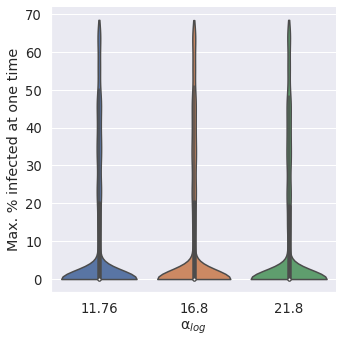

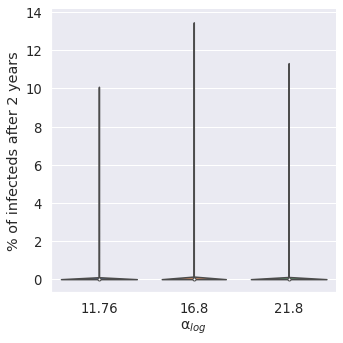

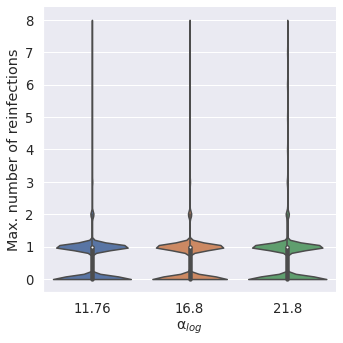

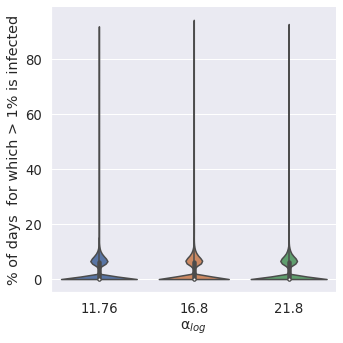

cut


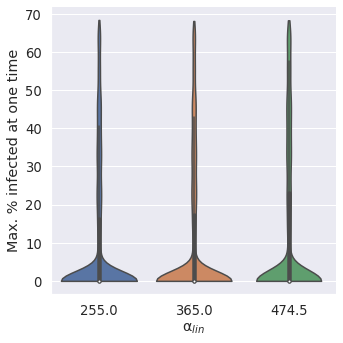

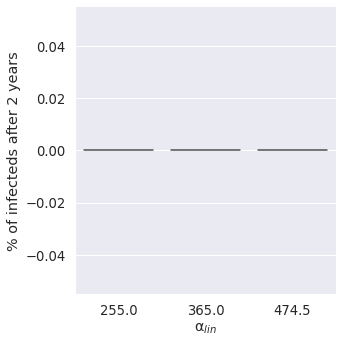

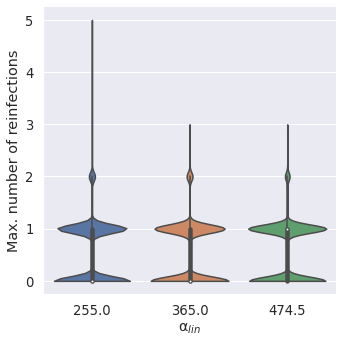

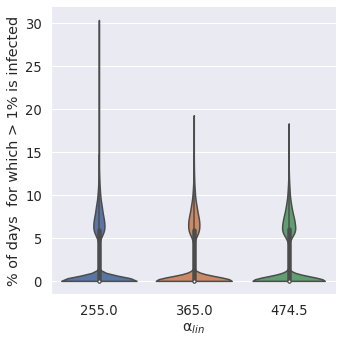

imlen


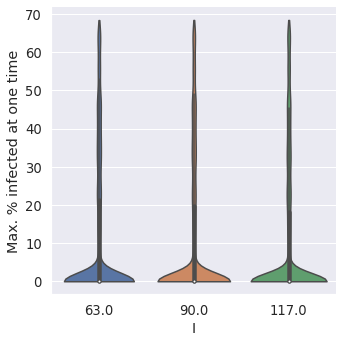

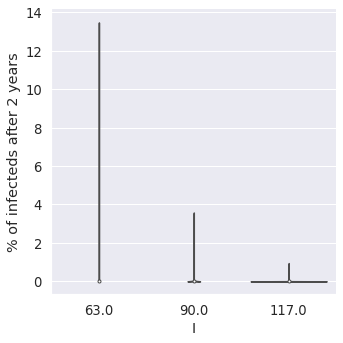

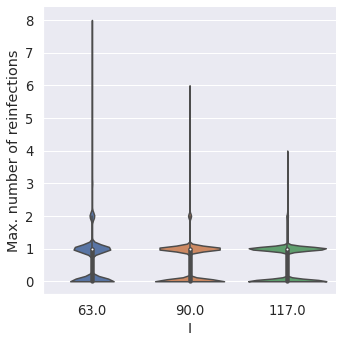

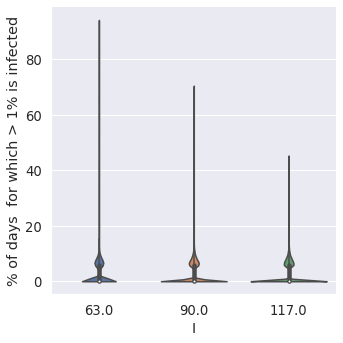

adj


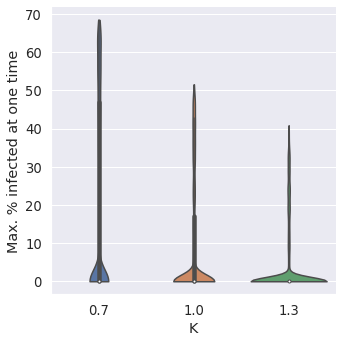

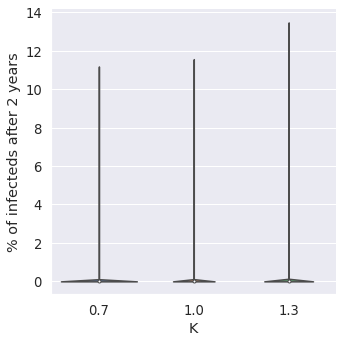

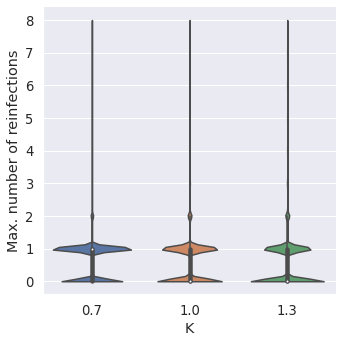

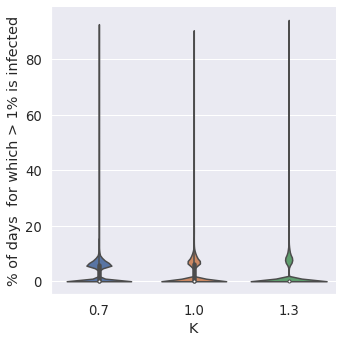

In [22]:
plot_model_properties("alph")
plot_model_properties("cut")
plot_model_properties("imlen")
plot_model_properties("adj")